In [48]:
import matplotlib.pyplot as plt
import math

In [49]:
a1=1.29677
b1=1.98710
a2=1.33540
b2=2.07742
ma=(a1+a2)/2
mb=(b1+b2)/2
d1=b1-a1
d2=b2-a2
md=(mb-ma)/2
mm=(mb+ma)/2
x1,x2=0,0
mode = max(a1,b1,a2,b2)==b2
if not mode:
    b1,b2=b2,b1
if not (a1 < a2 and a2 < b1 and b1 < b2):
    print("error")
    exit(0)

In [50]:
def f(x,mm,md,x1,x2):
    return mm+x2*math.sin(x/2)+(1+x1*math.sin(x/2))*md*math.sin(x)

In [51]:
def map_val(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)
# map_val(125,0,1000,-math.pi/2,math.pi/2)

In [52]:
x =[map_val(xi,0,2000,-2*math.pi,2*math.pi) for xi in range(2001)]
y =[f(xi,mm,md,0,0) for xi in x]

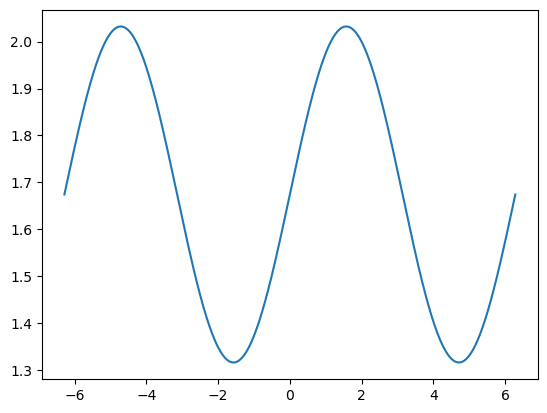

In [53]:
plt.plot(x,y)

In [54]:
def bisection_method(f, a, b, tol=1e-8, max_iter=258):
    """
    Find a root of the function f in the interval [a, b] using the bisection method.

    Parameters:
    f (function): The function for which we want to find a root.
    a (float): The left endpoint of the interval.
    b (float): The right endpoint of the interval.
    tol (float, optional): The desired accuracy of the root. Default is 1e-8.
    max_iter (int, optional): The maximum number of iterations to perform. Default is 100.

    Returns:
    float: An approximation to the root of f in the interval [a, b].
    """
    if abs(f(a)) <tol:
        return a
    if abs(f(b)) < tol:
        return b
        
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    # Perform bisection method
    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    # If max_iter is reached, return the best approximation
    return (a + b) / 2


In [55]:

def f_x2():
    global mm,md,d2
    solver = lambda xi: (f(math.pi/2,mm,md,0,xi)-f(-math.pi/2,mm,md,0,xi))-d2
    return bisection_method(solver,0,1,1e-12,64)


def f_x1():
    global mm,md,x2,b2
    solver = lambda x: f(math.pi/2,mm,md,x,x2)-b2
    return bisection_method(solver,0,math.pi,1e-12,64)


def f_x(y,stp):
    global mm,md,x1,x2
    solver  = lambda x: f(x,mm,md,x1,x2)-y
    mn = 0
    mx = 0
    if stp == 0:
        mn = 3*math.pi/2
        mx = 5*math.pi/2
    if stp == 1:
        mn = -3*math.pi/2
        mx = -math.pi/2
    if stp == 2:
        mn = -math.pi/2
        mx = math.pi/2
    if stp == 3:
        mn = math.pi/2
        mx = 3*math.pi/2
    
    return (bisection_method(solver,mn,mx,1e-10,64)-mn)*180/math.pi


In [56]:

x2=f_x2()

In [57]:
(f(math.pi/2,mm,md,0,x2)-f(-math.pi/2,mm,md,0,x2))-d2


-1.7763568394002505e-15

In [58]:
x1=f_x1()

In [59]:
f(math.pi/2,mm,md,x1,x2)-b2

-1.936228954946273e-13

In [60]:
f_x(2.009,2)

148.90782077796757